In [1]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential,Model
from keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
(X_Train,_),(_,_) = mnist.load_data()

In [3]:
print(X_Train.shape)

(60000, 28, 28)


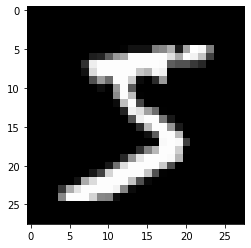

In [4]:
plt.imshow(X_Train[0],cmap='gray')
plt.show()

In [5]:
# Normalize this data [-1,1] 
X_Train  = (X_Train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))

print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [6]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) 
HALF_BATCH = 128
NOISE_DIM = 100 # Upsample into 784 Dim Vector
adam = Adam(lr=2e-4,beta_1=0.5)

In [15]:
# Generator 
# Input Noise (100 dim) and Outputs a Vector (784 dim)

generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))

generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 784)              

In [16]:
# Downsampling 
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)

discriminator.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [17]:
# GAN (Step-2)
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM,))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

# Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [10]:
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


In [18]:
def save_imgs(epoch,samples=100):
    noise=np.random.normal(0,1,size=(samples,NOISE_DIM))
    generated_imgs=generator.predict(noise)
    generated_imgs=generated_imgs.reshape(samples,28,28)
    plt.figure(figsize=(10,10))
    for i in range(samples):
        plt.subplot(10,10,i+1)
        plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
        plt.axis("off")
        
    plt.tight_layout()
    plt.savefig('images/gan_output_epoch_{0}.png'.format(epoch+1))
    plt.show()

Epoch 1 Disc Loss 0.5662 Generator Loss 1.4242
Epoch 2 Disc Loss 0.5436 Generator Loss 1.5029
Epoch 3 Disc Loss 0.5567 Generator Loss 1.4602
Epoch 4 Disc Loss 0.5411 Generator Loss 1.4986
Epoch 5 Disc Loss 0.5489 Generator Loss 1.4291


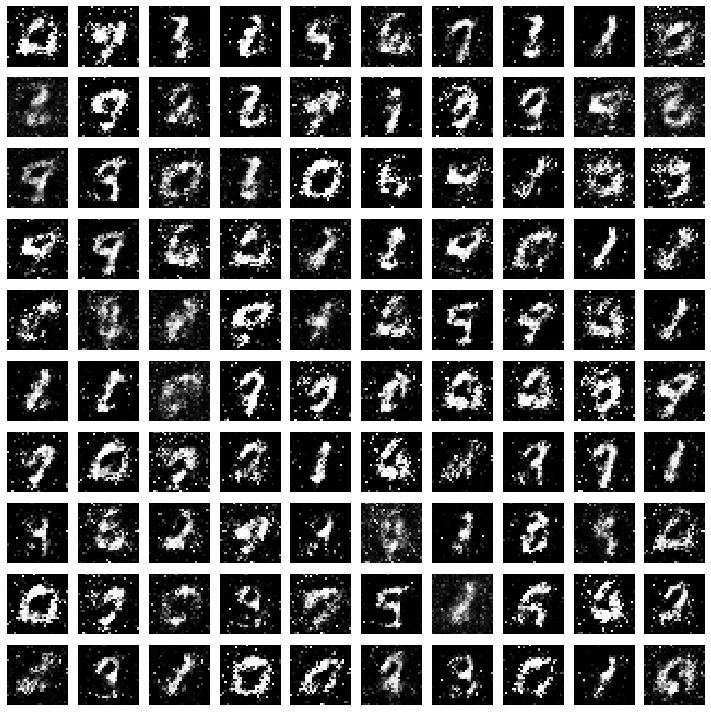

Epoch 6 Disc Loss 0.5528 Generator Loss 1.3864
Epoch 7 Disc Loss 0.5687 Generator Loss 1.3409
Epoch 8 Disc Loss 0.5937 Generator Loss 1.2427
Epoch 9 Disc Loss 0.6241 Generator Loss 1.1415
Epoch 10 Disc Loss 0.6221 Generator Loss 1.1308


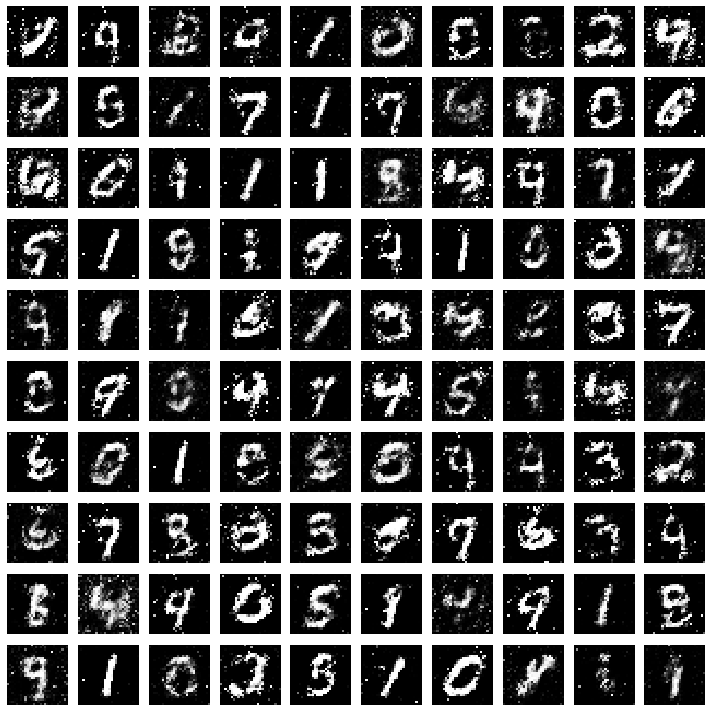

Epoch 11 Disc Loss 0.6284 Generator Loss 1.0989
Epoch 12 Disc Loss 0.6291 Generator Loss 1.0911
Epoch 13 Disc Loss 0.6282 Generator Loss 1.0881
Epoch 14 Disc Loss 0.6358 Generator Loss 1.0669
Epoch 15 Disc Loss 0.6376 Generator Loss 1.0609


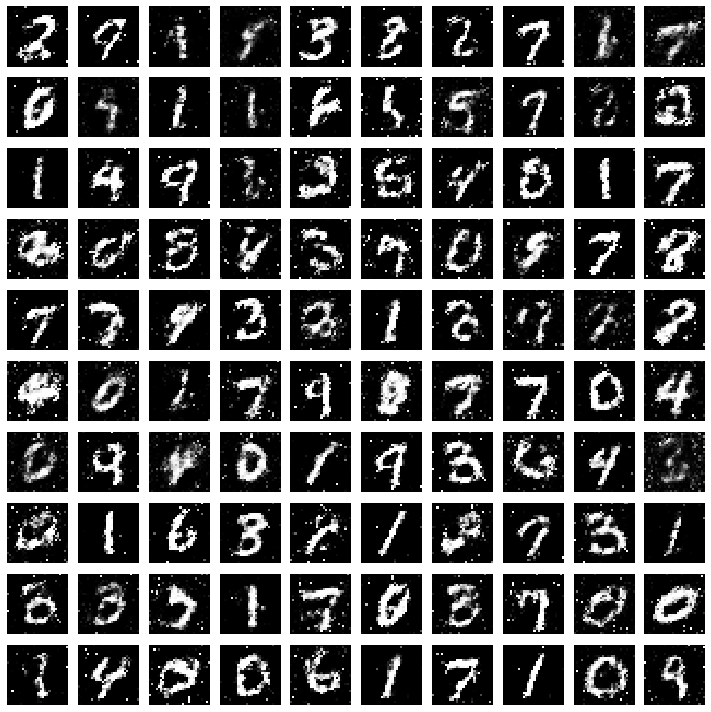

Epoch 16 Disc Loss 0.6405 Generator Loss 1.0547
Epoch 17 Disc Loss 0.6464 Generator Loss 1.0376
Epoch 18 Disc Loss 0.6452 Generator Loss 1.0291
Epoch 19 Disc Loss 0.6477 Generator Loss 1.0356
Epoch 20 Disc Loss 0.6519 Generator Loss 1.0307


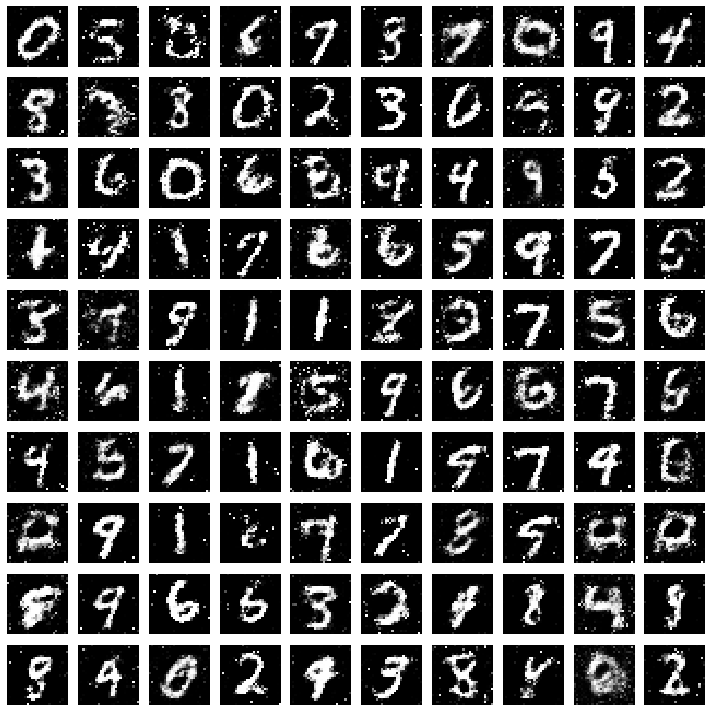

Epoch 21 Disc Loss 0.6523 Generator Loss 1.0198
Epoch 22 Disc Loss 0.6553 Generator Loss 1.0195
Epoch 23 Disc Loss 0.6551 Generator Loss 1.0223
Epoch 24 Disc Loss 0.6584 Generator Loss 1.0129
Epoch 25 Disc Loss 0.6567 Generator Loss 1.0113


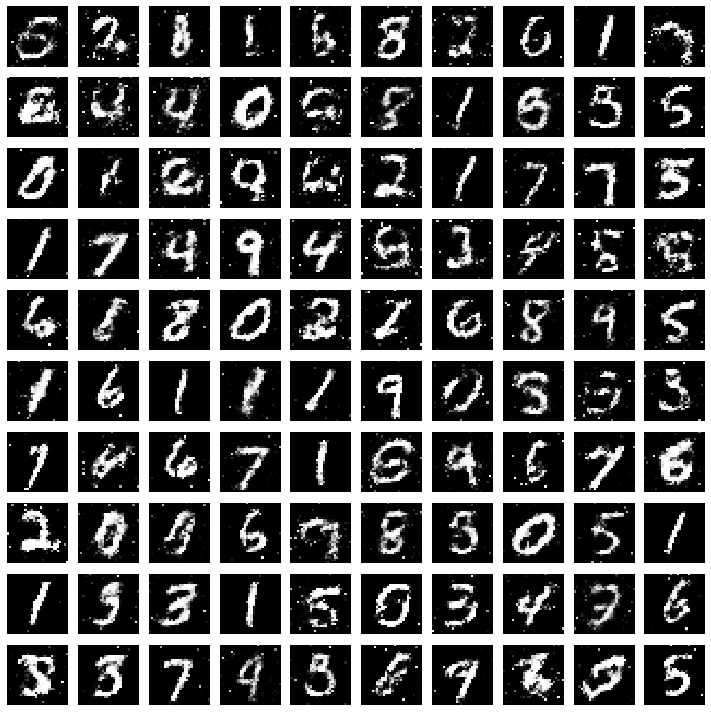

Epoch 26 Disc Loss 0.6587 Generator Loss 1.0121
Epoch 27 Disc Loss 0.6604 Generator Loss 1.0076
Epoch 28 Disc Loss 0.6600 Generator Loss 1.0093
Epoch 29 Disc Loss 0.6600 Generator Loss 0.9996
Epoch 30 Disc Loss 0.6617 Generator Loss 1.0049


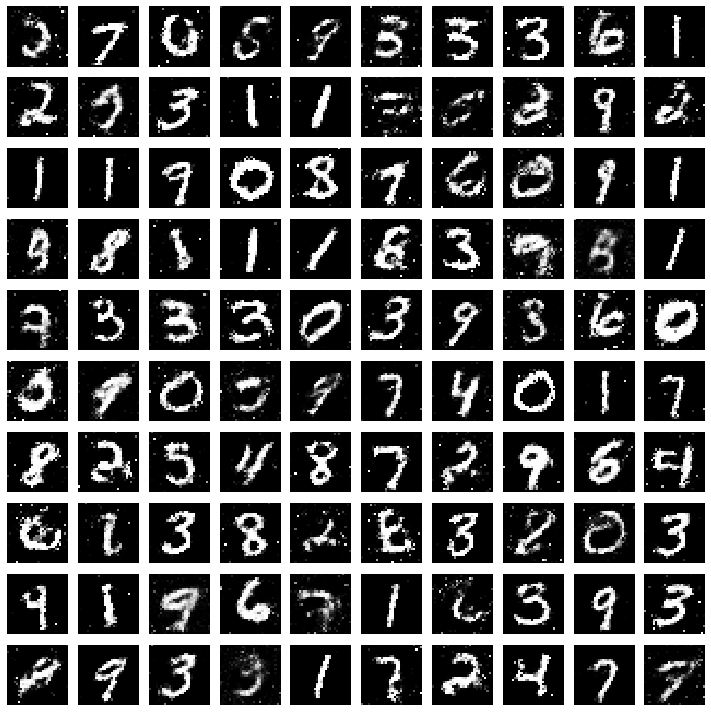

Epoch 31 Disc Loss 0.6613 Generator Loss 0.9996
Epoch 32 Disc Loss 0.6609 Generator Loss 1.0022
Epoch 33 Disc Loss 0.6618 Generator Loss 0.9961
Epoch 34 Disc Loss 0.6614 Generator Loss 1.0027
Epoch 35 Disc Loss 0.6617 Generator Loss 1.0046


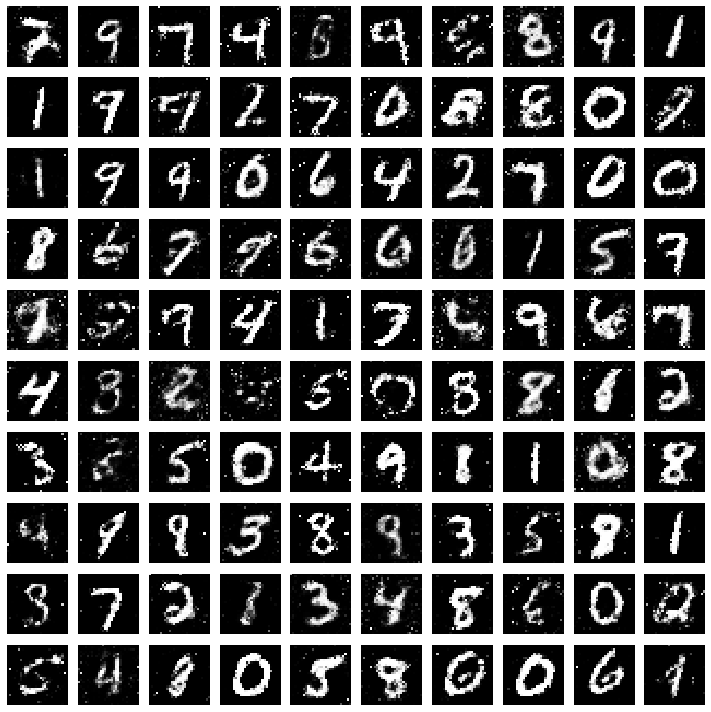

Epoch 36 Disc Loss 0.6624 Generator Loss 1.0039
Epoch 37 Disc Loss 0.6607 Generator Loss 1.0018
Epoch 38 Disc Loss 0.6630 Generator Loss 1.0031
Epoch 39 Disc Loss 0.6634 Generator Loss 1.0002
Epoch 40 Disc Loss 0.6643 Generator Loss 1.0010


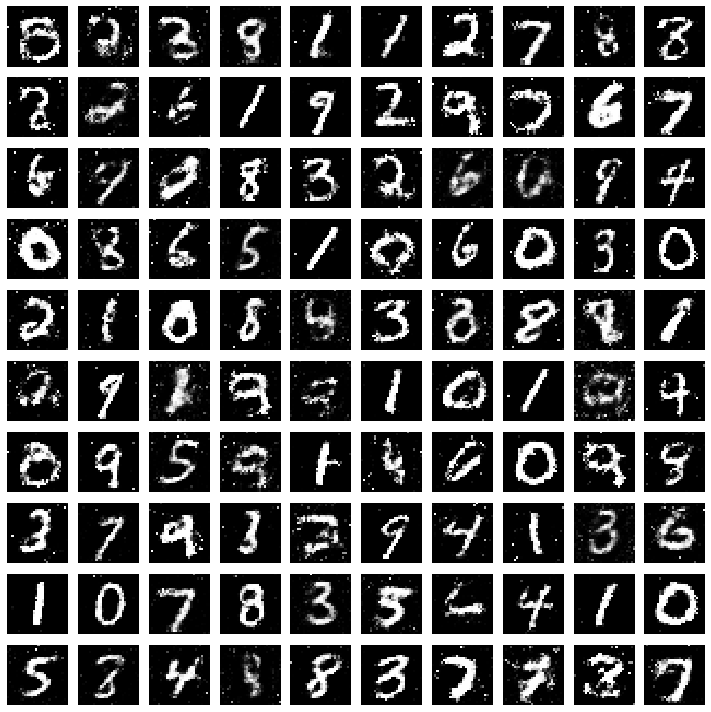

Epoch 41 Disc Loss 0.6636 Generator Loss 0.9958
Epoch 42 Disc Loss 0.6650 Generator Loss 0.9950
Epoch 43 Disc Loss 0.6634 Generator Loss 0.9958
Epoch 44 Disc Loss 0.6642 Generator Loss 0.9955
Epoch 45 Disc Loss 0.6648 Generator Loss 1.0001


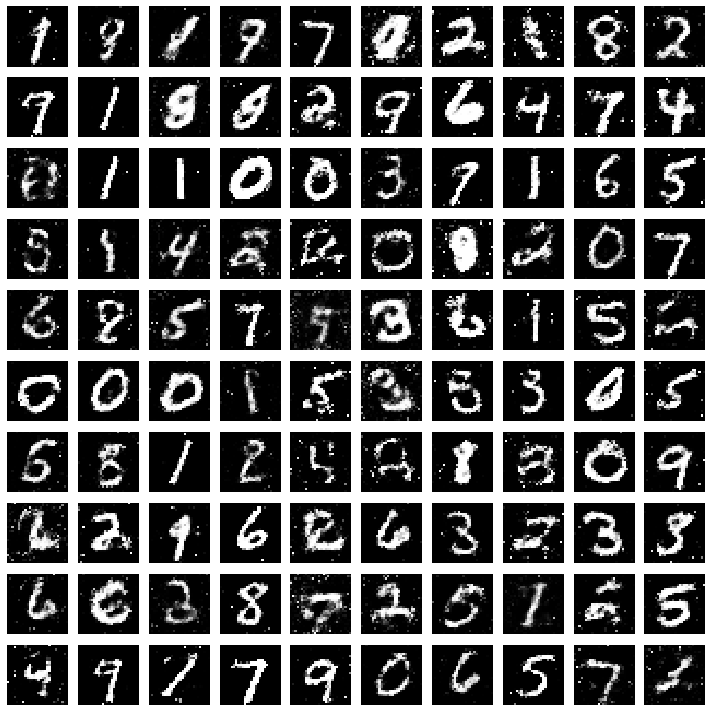

Epoch 46 Disc Loss 0.6649 Generator Loss 0.9965
Epoch 47 Disc Loss 0.6640 Generator Loss 0.9967
Epoch 48 Disc Loss 0.6652 Generator Loss 0.9912
Epoch 49 Disc Loss 0.6657 Generator Loss 0.9936
Epoch 50 Disc Loss 0.6663 Generator Loss 0.9939


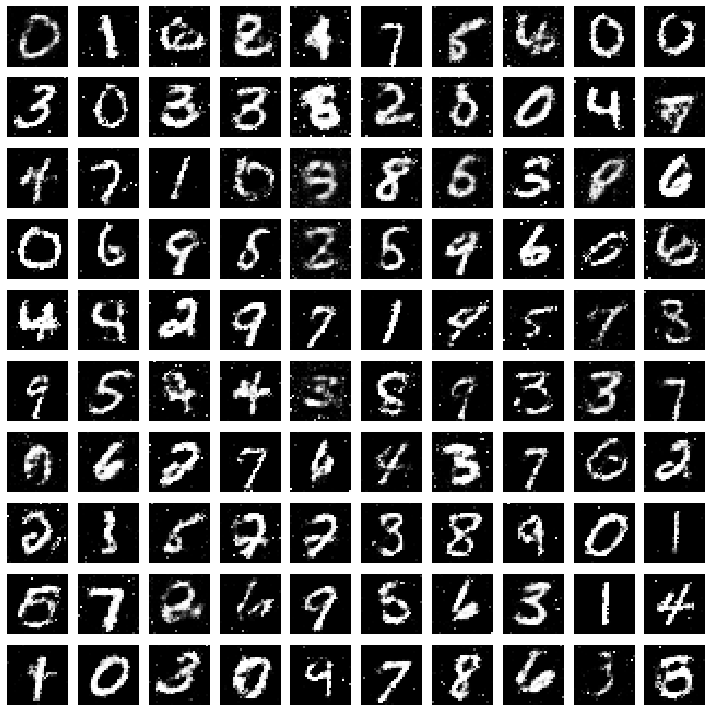

In [20]:
# Training Loop
d_losses = []
g_losses = []


for epoch in range(TOTAL_EPOCHS):
    epoch_d_loss = 0.
    epoch_g_loss = 0.
    
    #Mini Batch SGD
    for step in range(NO_OF_BATCHES):
        
        # Step-1 Discriminator 
        # 50% Real Data + 50% Fake Data
        
        #Real Data 
        idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH)
        real_imgs = X_Train[idx]
        
        #Fake Data 
        noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
        fake_imgs = generator.predict(noise) #Forward pass
        
        
        # Labels 
        real_y = np.ones((HALF_BATCH,1))*0.9 #One Side Label Smoothing for Discriminator
        fake_y = np.zeros((HALF_BATCH,1))
        
        # Train our Discriminator
        d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
        d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
        d_loss = 0.5*d_loss_real + 0.5*d_loss_fake
        
        epoch_d_loss += d_loss
        
        # Train Generator (Considering Frozen Discriminator)
        noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
        ground_truth_y = np.ones((BATCH_SIZE,1))
        g_loss = model.train_on_batch(noise,ground_truth_y)
        epoch_g_loss += g_loss
        
    print("Epoch %d Disc Loss %.4f Generator Loss %.4f" %((epoch+1),epoch_d_loss/NO_OF_BATCHES,epoch_g_loss/NO_OF_BATCHES))
    d_losses.append(epoch_d_loss/NO_OF_BATCHES)
    g_losses.append(epoch_g_loss/NO_OF_BATCHES)
    
    if (epoch+1)%5==0:
        generator.save('model/gan_generator_{0}.h5'.format(epoch+1))
        save_imgs(epoch)


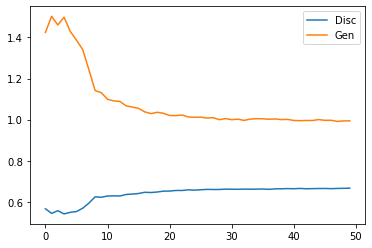

In [21]:
plt.plot(d_losses,label="Disc")
plt.plot(g_losses,label="Gen")
plt.legend()
plt.show()
